### 문제 정의
- 머신러닝을 통해서 어떤 문제를 해결할 것인가?
- 지도 vs 비지도 vs 강화
- 지도 : 분류 vs 회귀

- 비만을 판단하는 모델을 만들자
- 지도학습 - 분류모델 사용

In [170]:
# warning 없애기
import warnings
warnings.filterwarnings('ignore')

### 데이터 수집
- csv파일로 이루어진 데이터 수집
- 500명의 성별, 키, 몸무게, 비만도 등급

In [171]:
# pandas 라이브러리 불러와서 csv 파일의 데이터를 bmi 변수에 담아주기
import pandas as pd

In [172]:
bmi = pd.read_csv('./data/bmi_500.csv')
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


### 데이터 전처리 
- 결측치 처리 : 비어있는 데이터를 채워주기
- 이상치 처리 : 정상적인 범위에서 벗어난 데이터 수정하기

#### 결측치 확인
- 데이터 정보 및 결측치 확인하는 함수 : info()

In [173]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


#### 이상치 확인
- describe() 함수 : 수치형 데이텀나 분석 가능, 기술통계

In [174]:
bmi.describe()

# count : 데이터 수
# mean : 평균값
# std : 표준편차
# min : 최소값
# 25% : 1분위수
# 50% : 중앙값
# 75% : 3분위수
# max : 최대값

# 1. min, max 확인하기
# 2. 평균(mean), 중앙값(50%) 확인하기 -> 두 수치가 비슷 : 이상치 X
# 3. 평균값과 중앙값의 수치가 비슷하지 않다면 min ~ max까지 5개의 간격을 확인하기
#                                          --> 각 구간의 데이터가 고르게 분포되어 있는지 확인

# 우리 데이터는 거의 다 정상적인 데이터로 판단이 됨

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


### 탐색적 데이터 분석(EDA)
- 데이터를 자세하게 살펴보자
- 비만도별로 데이터가 잘 나뉘어져 있는지 확인

#### 비만도 등급 확인

In [175]:
# 중복없이 값을 확인하는 함수 : unique()
bmi['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

#### 비만도가 Normal인 사람들만 추려보기

In [176]:
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [177]:
# 불리언 인덱싱을 사용하여 Normal 등급인 사람만 꺼내오기
normal = bmi['Label'] == 'Normal'

# 산점도를 이용하여 데이터를 표현
scatter_data = bmi.loc[normal] # 라벨이 'Normal'인 전체 행에 대한 데이터를 가지고 와서 변수에 저장
scatter_data

,Gender,Height,Weight,Label
1,Male,189,87,Normal
10,Male,195,81,Normal
13,Male,155,51,Normal
14,Male,191,79,Normal
24,Female,172,67,Normal
...,...,...,...,...
472,Female,178,65,Normal
477,Male,167,64,Normal
478,Female,151,55,Normal
487,Male,187,80,Normal


#### Norlmal인 사람들을 그래프로 그리기

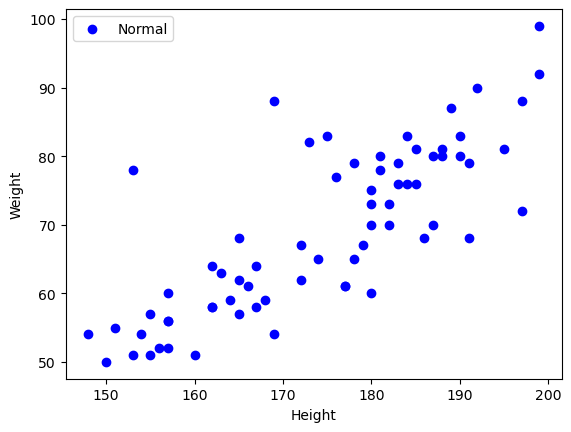

In [178]:
import matplotlib.pyplot as plt
# plt.scatter(x,y) - 산점도 차트
plt.scatter(scatter_data['Height'],scatter_data['Weight'], color = 'blue', label = 'Normal')
plt.legend() # 차트에서 그린 label 출력
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#### 비만도가 'Obesity'인 사람만 추려서 그래프(color -green)로 그려보기

In [179]:
scatter_ob_data = bmi[bmi['Label'] == 'Obesity']

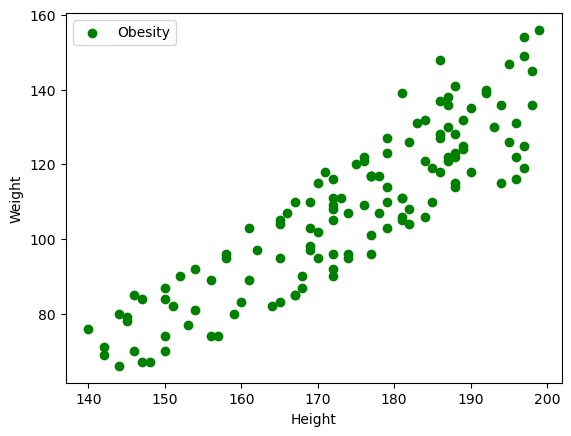

In [180]:
plt.scatter(scatter_ob_data['Height'], scatter_ob_data['Weight'], color = 'green', label ='Obesity')
plt.legend()
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#### 함수로 만들어서 그래프 그리기
- 반복되는 부분을 함수로 간략화(코드 간략화)

#### 전체 그래프 그리기

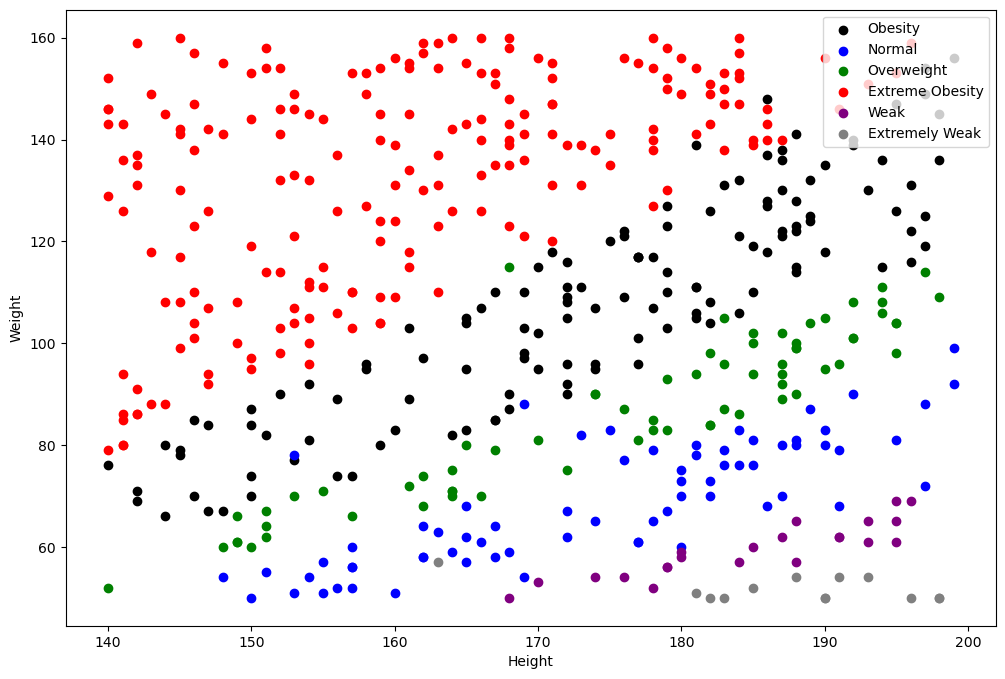

In [181]:
def myScatter(label, color) :
    scatter_data = bmi[bmi['Label'] == label]
    plt.scatter(scatter_data['Height'], scatter_data['Weight'], color = color, label = label)
    
# 'Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak', 'Extremely Weak'

plt.figure(figsize=(12,8))

myScatter('Obesity','black')
myScatter('Normal','blue')
myScatter('Overweight','green')
myScatter('Extreme Obesity','red')
myScatter('Weak','purple')
myScatter('Extremely Weak','gray')
plt.legend()
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [182]:
# 이상치 수정하기
# 키가 153이고 몸무게가 78인 사람이 Normal로 잘못 표기
# Noraml을 -> Obesity로 변경
bmi.loc[bmi['Weight'] == 78]

,Gender,Height,Weight,Label
165,Male,181,78,Normal
231,Female,153,78,Normal
234,Male,145,78,Obesity


In [183]:
bmi.loc[231, 'Label'] = "Obesity"

In [184]:
bmi.loc[bmi['Weight'] == 78]

,Gender,Height,Weight,Label
165,Male,181,78,Normal
231,Female,153,78,Obesity
234,Male,145,78,Obesity


### 모델 선택 및 하이퍼 파라미터 조정
- 머신러닝 모델 불러와서 사용하는 단계

#### 모델 불러오기
- KNN 모델

In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
# 모델 생성
knn_model = KNeighborsClassifier(n_neighbors=3)

#### 문제데이터와 정답데이터로 분리

In [187]:
# 머신러닝은 수치형 데이터만 학습할 수 있음
# 문자형 데이터 - 성별 컬럼은 학습할 수 없음
# 키/몸무게 컬럼만 문제 데이터

# 문제 데이터 : Height, Weight
X = bmi.loc[:,'Height':'Weight']
X
# 정답 데이터 : Label
y = bmi.loc[:, 'Label']
y

0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 500, dtype: object

#### 학습을 위해 훈련용(train)과 평가용(test)으로 분리
- 훈련 70% : 평가 30%

In [188]:
X_train = X.iloc[:350]
X_test = X.iloc[350:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

In [189]:
print('훈련용 문제 :', X_train.shape)
print('평가용 문제 :', X_test.shape)
print('훈련용 답 :', y_train.shape)
print('평가용 답 :', y_test.shape)

훈련용 문제 : (350, 2)
평가용 문제 : (150, 2)
훈련용 답 : (350,)
평가용 답 : (150,)


### 모델 학습

In [190]:
# fit(문제, 정답)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### 모델 평가
- 새로운 데이터에 대해서 예측
- 모델이 제대로 만들어졌는지 평가

In [191]:
# 예측
knn_model.predict([[174,68]])

array(['Normal'], dtype=object)

In [192]:
# 평가 : 만들어진 모델에 평가 -> 학습에 사용하지 않은 새로운 문제(예측)와 정답(예측과 비교)이 필요
# 평가 수치 : 몇 개를 맞췄는지 확인
# score(평가용 문제데이터, 평가용 정답데이터)
# 평가용 문제데이터의 학습을 통해 발견한 규칙으로 예축 --> 예측에 대한 정답(실제 정답은 아님)
# 평가용 정답데이터와 예측된 정답을 비교해서 백분율로 나타낸 값
knn_model.score(X_test,y_test)

# 150개 중 134개 맞춤 -> 정확도(accuracy) 89.3%

0.9

In [193]:
knn_model.score(X_train,y_train)

# 평가용 데이터보다 정확도가 높게 나오는 이유는 
# 규칙을 찾는데 사용된 데이터를 기반으로 모델을 평가했기 때문에 score가 높음

0.9371428571428572

### KNN이란

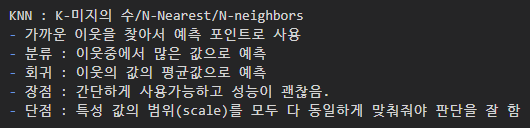

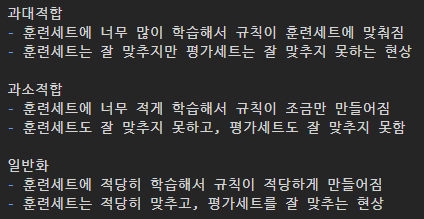

### 하이퍼 파라미터 튜닝하기
- KNN 모델의 하이퍼 파라미터(n_neighbors)의 변화에 따라 score값을 확인
- 최적의 하이퍼 파라미터를 찾기 위해서 

In [207]:
from sklearn.neighbors import KNeighborsClassifier
# 점수를 저장할 list 생성
train_acc = []
test_acc = []

# n_neighbors를 1 ~ 30까지 생성
for i in range(1,31) :
    # n_neighbors를 변경하면서 모델을 생성
    knn_model = KNeighborsClassifier(n_neighbors=i)
    # 생성된 모델에 학습
    knn_model.fit(X_train,y_train)
    
    # 만들어진 규칙으로 score값 저장
    # 과대적합, 과소적합, 확인을 위한 데이터로 저장
    train_acc.append(knn_model.score(X_train,y_train))
    test_acc.append(knn_model.score(X_test,y_test))

    
# print(f'{i}번째 score : {knn_model.score(X_test,y_test)}')

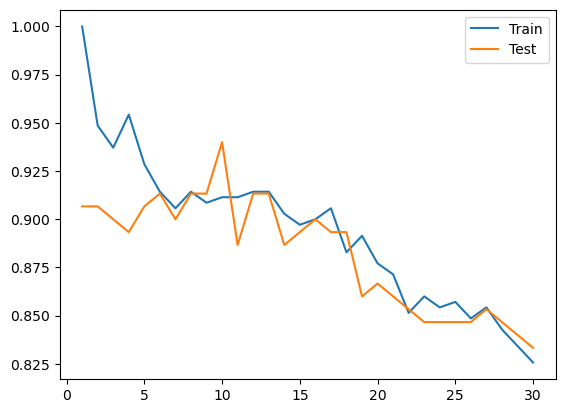

In [208]:
# 모델 복잡도 - 그래프로 확인하기
import matplotlib.pyplot as plt

# 선 그래프(x축, y축 값이 필요)
# X 축 : n_neighbors = range(1, 31)
# y 축 : 정확도(accuracy)

plt.plot(range(1,31), train_acc, label = 'Train')
plt.plot(range(1,31), test_acc, label = 'Test')
plt.legend()
plt.show()